


Epoch 1/50

37/37 [==============================] - 3s 19ms/step - loss: 0.0552 - val_loss: 0.0058
Epoch 2/50
37/37 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 3/50
37/37 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 8.8541e-04
Epoch 4/50
37/37 [==============================] - 0s 7ms/step - loss: 0.0010 - val_loss: 8.3506e-04
Epoch 5/50
37/37 [==============================] - 0s 8ms/step - loss: 9.7047e-04 - val_loss: 7.9876e-04
Epoch 6/50
37/37 [==============================] - 0s 8ms/step - loss: 9.8594e-04 - val_loss: 7.8460e-04
Epoch 7/50
37/37 [==============================] - 0s 7ms/step - loss: 9.4054e-04 - val_loss: 7.5495e-04
Epoch 8/50
37/37 [==============================] - 0s 8ms/step - loss: 9.1848e-04 - val_loss: 9.0703e-04
Epoch 9/50
37/37 [==============================] - 0s 7ms/step - loss: 9.6965e-04 - val_loss: 7.8580e-04
Epoch 10/50
37/37 [==============================] - 0s 8ms/step 

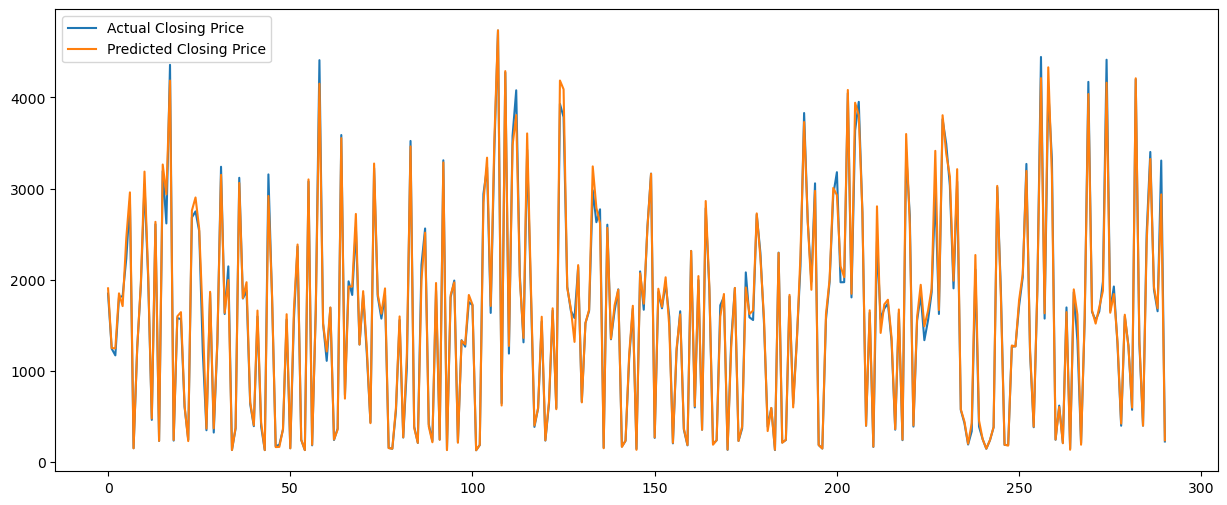

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
# Replace 'your_data_file.csv' with the actual file path or URL of your dataset
df = pd.read_csv('ETH-USD.csv')

# Data preprocessing
# Assuming the dataset has a column named 'close' for closing prices
data = df[['Close']].values.astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for time series prediction
sequence_length = 10  # You can adjust this based on your preference
X, y = [], []

for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    target = scaled_data[i+sequence_length:i+sequence_length+1]
    X.append(seq)
    y.append(target)

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
# Flatten y_test and y_pred before calculating mean squared error
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Calculate mean squared error
mse = mean_squared_error(y_test_flat, y_pred_flat)
print(f'Mean Squared Error: {mse}')

# Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

# Inverse transform the predictions to get the actual closing prices
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results if needed
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_test_actual, label='Actual Closing Price')
plt.plot(y_pred_actual, label='Predicted Closing Price')
plt.legend()
plt.show()


In [5]:
def predict_future_closing_price(data, sequence_length, scaler, model, num_days):
    predictions = []

    for _ in range(num_days):
        # Take the last 'sequence_length' days for prediction
        last_sequence = data[-sequence_length:]

        # Scale the last sequence
        last_sequence_scaled = scaler.transform(last_sequence)

        # Reshape to match the input shape of the model
        last_sequence_scaled = last_sequence_scaled.reshape((1, sequence_length, 1))

        # Use the model to predict the next day's closing price
        predicted_scaled = model.predict(last_sequence_scaled)

        # Inverse transform the predicted value to get the actual closing price
        predicted_actual = scaler.inverse_transform(predicted_scaled.reshape(-1, 1))

        # Append the predicted value to the data for the next iteration
        data = np.concatenate([data, predicted_actual])

        # Append the predicted value to the list of predictions
        predictions.append(predicted_actual[0, 0])

    return predictions

# Number of days to predict in the future
num_days_to_predict = 360  # You can adjust this based on your requirement

# Make predictions
future_predictions = predict_future_closing_price(data, sequence_length, scaler, model, num_days_to_predict)

# Print the predicted closing prices for the specified number of days
for i, prediction in enumerate(future_predictions):
    print(f'Day {i+1}: Predicted Closing Price: {prediction}')

1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 25ms/step
Day 1: Predicted Closing Price: 1661.24462890625
Day 2: Predicted Closing Price: 1670.665771484375
Day 3: Predicted Closing Price: 1683.1820068359375
Day 4: Predicted Closing Price: 1697.3282470703125
Day 5: Predicted Closing Price: 1712.5264892578125
Day 6: Predicted Closing Price: 1727.672119140625
Day 7: Predicted Closing Price: 1743.0980224609375
Day 8: Predicted Closing Price: 1758.9105224609375
Day 9: Predicted Closing Price: 1774.6259765625
Day 10: Predicted Closing Price: 1790.72802734375
Day 11: Predicted Closing Price: 1806.7913818359375
Day 12: Predicted Closing Price: 1823.09765625
Day 13: Predicted Closing Price: 1839.5208740234375
Day 14: Predicted Closing Price: 1856.0614013671875
Day 15: Predicted Closing Price: 1872.71728515625
Day 16: Predicted Closing Price: 1889.4976806640625
Day 17: Predicted Closing Price: 1906.417236328125
Day 18: Predicted Closing Price: 1923.558349609375
Day 19: Predicted Closing Price: 1940.8

In [6]:
from datetime import datetime, timedelta


def predict_future_closing_price_for_date(data, sequence_length, scaler, model, target_date):
    predictions = []

    # Convert the target date to a datetime object
    target_date = datetime.strptime(target_date, '%Y-%m-%d')

    while True:
        # Take the last 'sequence_length' days for prediction
        last_sequence = data[-sequence_length:]

        # Scale the last sequence
        last_sequence_scaled = scaler.transform(last_sequence)

        # Reshape to match the input shape of the model
        last_sequence_scaled = last_sequence_scaled.reshape((1, sequence_length, 1))

        # Use the model to predict the next day's closing price
        predicted_scaled = model.predict(last_sequence_scaled)

        # Inverse transform the predicted value to get the actual closing price
        predicted_actual = scaler.inverse_transform(predicted_scaled.reshape(-1, 1))

        # Append the predicted value to the data for the next iteration
        data = np.concatenate([data, predicted_actual])

        # Get the date of the next day
        next_day = target_date + timedelta(days=len(predictions))

        # Check if the next day's date matches the target date
        if next_day.strftime('%Y-%m-%d') == target_date.strftime('%Y-%m-%d'):
            break

        # Append the predicted value to the list of predictions
        predictions.append({
            'Date': next_day.strftime('%Y-%m-%d'),
            'Predicted Closing Price': predicted_actual[0, 0]
        })

    return predictions

# Specify the target date for prediction
target_date_to_predict = '2024-02-10'  # Adjust this to your desired future date

# Make predictions
future_predictions = predict_future_closing_price_for_date(data, sequence_length, scaler, model, target_date_to_predict)

# Print the predicted closing prices for the specified date
for prediction in future_predictions:
    print(f"On {prediction['Date']}, Predicted Closing Price: {prediction['Predicted Closing Price']}")


1/1 [==============================] - 0s 25ms/step
